# Transforming skewed columns

Now all the null values have been removed, it's time to transform columns with a large amount of skew, to reduce any bias. 

In order to do, I'll first identify the amount of skew in each columns. Naturally this will only apply to columns with continuous and ordinal data. 

In [1]:
import pandas as pd
from data_imputer import Plotter
import seaborn as sns

df = pd.read_csv('nulls_removed.csv')

# Create instance of class and check the skewness for each column

skew = Plotter(df)
result = skew.check_skew()
print(result)


[{'Column': 'collection_recovery_fee', 'Skewness': 27.88167079517224}, {'Column': 'collections_12_mths_ex_med', 'Skewness': 20.22116455966995}, {'Column': 'recoveries', 'Skewness': 14.248560377661123}, {'Column': 'total_rec_late_fee', 'Skewness': 13.50324329626054}, {'Column': 'annual_inc', 'Skewness': 8.556799111166727}, {'Column': 'last_payment_amount', 'Skewness': 2.4894964982065306}, {'Column': 'out_prncp_inv', 'Skewness': 2.3566549700063923}, {'Column': 'out_prncp', 'Skewness': 2.3562463444863764}, {'Column': 'total_rec_int', 'Skewness': 2.2054187327780617}, {'Column': 'total_payment', 'Skewness': 1.272185432717388}, {'Column': 'total_rec_prncp', 'Skewness': 1.262113791078715}, {'Column': 'total_payment_inv', 'Skewness': 1.2616169148342238}, {'Column': 'term', 'Skewness': 1.005777021030775}, {'Column': 'instalment', 'Skewness': 0.9943337255194723}, {'Column': 'funded_amount', 'Skewness': 0.8687891444609548}, {'Column': 'funded_amount_inv', 'Skewness': 0.8128090115344193}, {'Column

There are some columns with an extreme amount of skew here, however it is hard to know exactly which columns we should focus on just from these numbers. This is because some of the columns, especially the ones with a very large skew, are most likely influenced by outliers.  Let's just look at the histograms of the columns with continuous data.

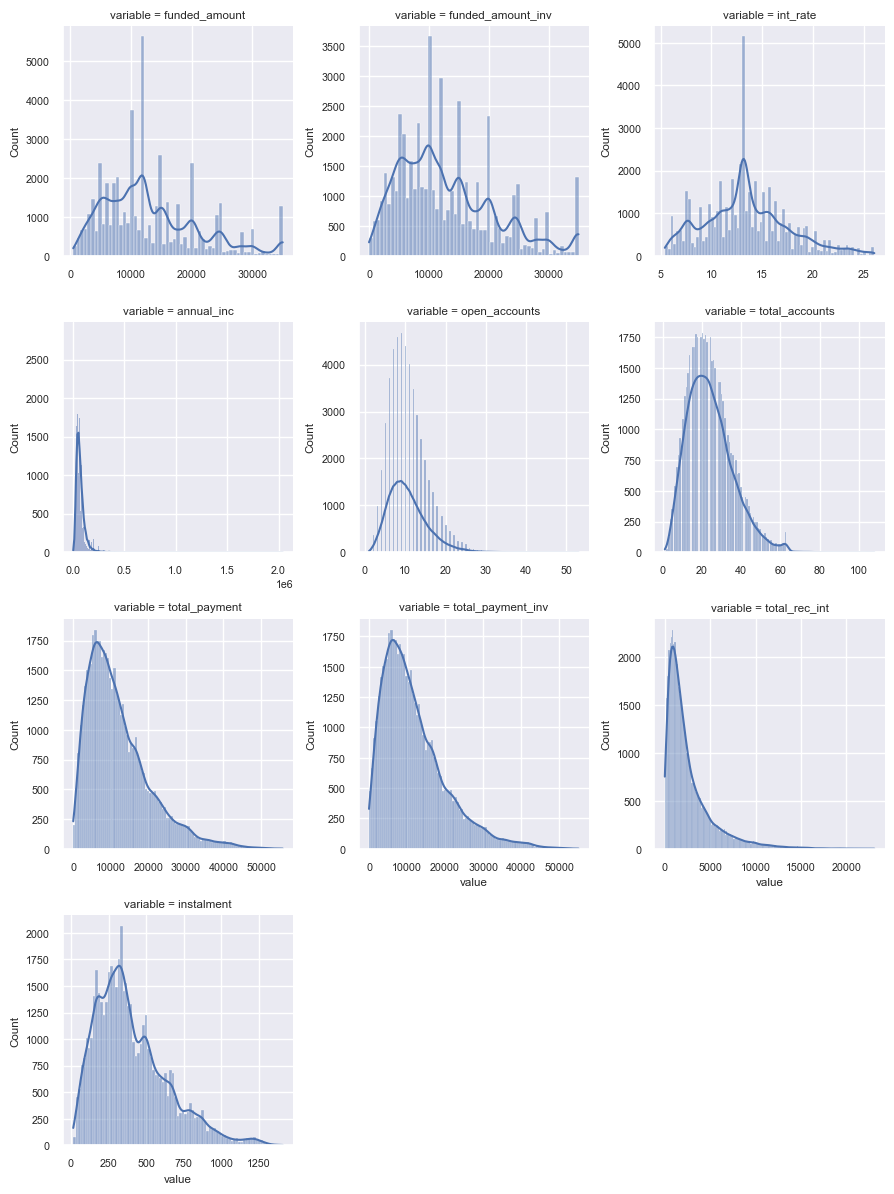

In [2]:
# Set numeric columns
numeric_columns = ['funded_amount',
                   'funded_amount_inv',
                   'int_rate',
                   'annual_inc',
                   'open_accounts',
                   'total_accounts',
                   'total_payment',
                   'total_payment_inv',
                   'total_rec_int',
                   'instalment']

categorical_features = [col for col in df.columns if col not in numeric_columns]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

This is a lot of graphs, but we can see we need to apply a transformation to the following columns:
- annual_inc
- open_accounts
- total_accounts
- total_payment
- total_payment_inv
- total_rec_int
- instalment

This is quite an easy process, let's just run a log plot on each one and print the results:

In [6]:
from data_imputer import DataFrameTransform

columns_to_transform = ['annual_inc',
                        'open_accounts',
                        'total_accounts',
                        'total_payment',
                        'total_payment_inv',
                        'total_rec_int',
                        'instalment']

skew_corrector = DataFrameTransform(df)
for columns in columns_to_transform:
    skew_corrector.correct_skew(columns, method='log')


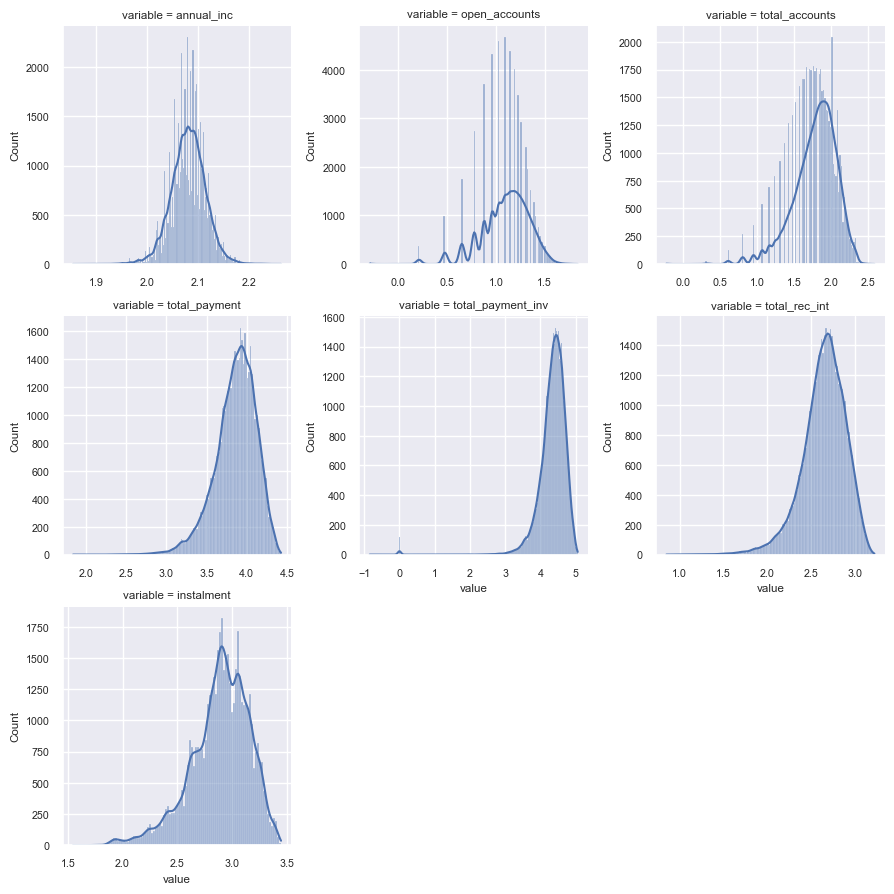

In [7]:
# Set numeric columns
numeric_columns = ['annual_inc',
                        'open_accounts',
                        'total_accounts',
                        'total_payment',
                        'total_payment_inv',
                        'total_rec_int',
                        'instalment']

categorical_features = [col for col in df.columns if col not in numeric_columns]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

These do not look especially good in reducing the skew. Perhaps the log plot was not the best choice here. Let's keep it general and try a Yeo-Johnson transform instead.

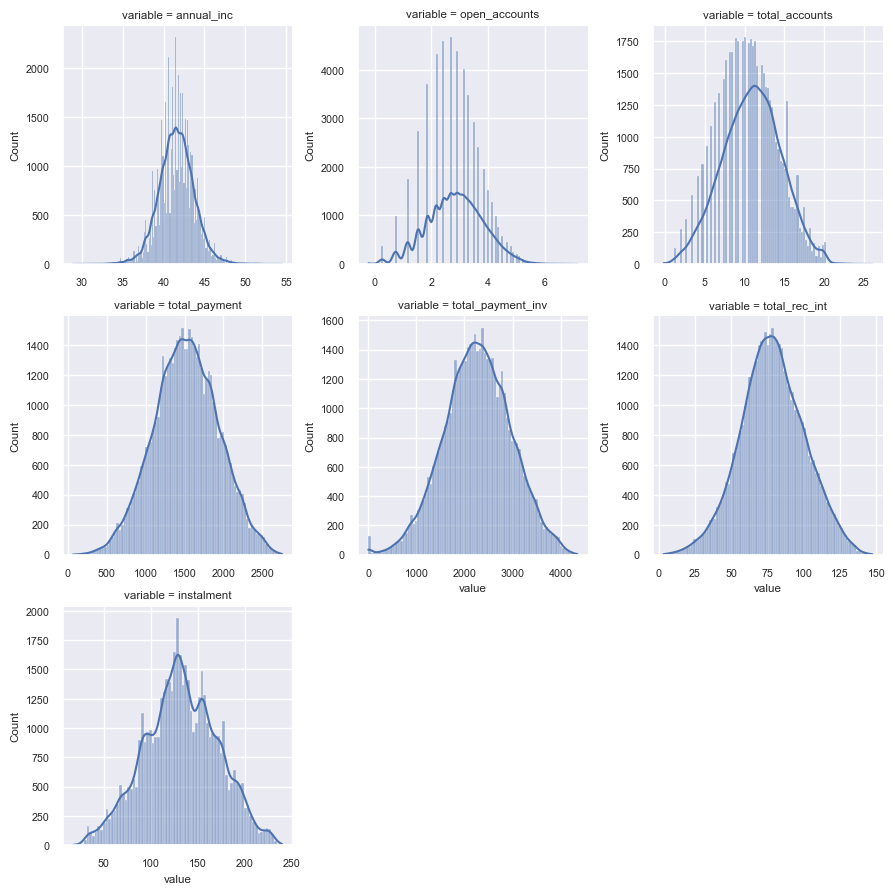

In [8]:
for columns in columns_to_transform:
    skew_corrector.correct_skew(columns, method='yeojohnson')

categorical_features = [col for col in df.columns if col not in numeric_columns]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

These look much better and have successfully reduced the skew in all necessary columns. Next, we can look look to remove any remaining outliers. This is done on remove_outliers.ipynb

In [5]:
df.to_csv('unskewed_data.csv', index=False)